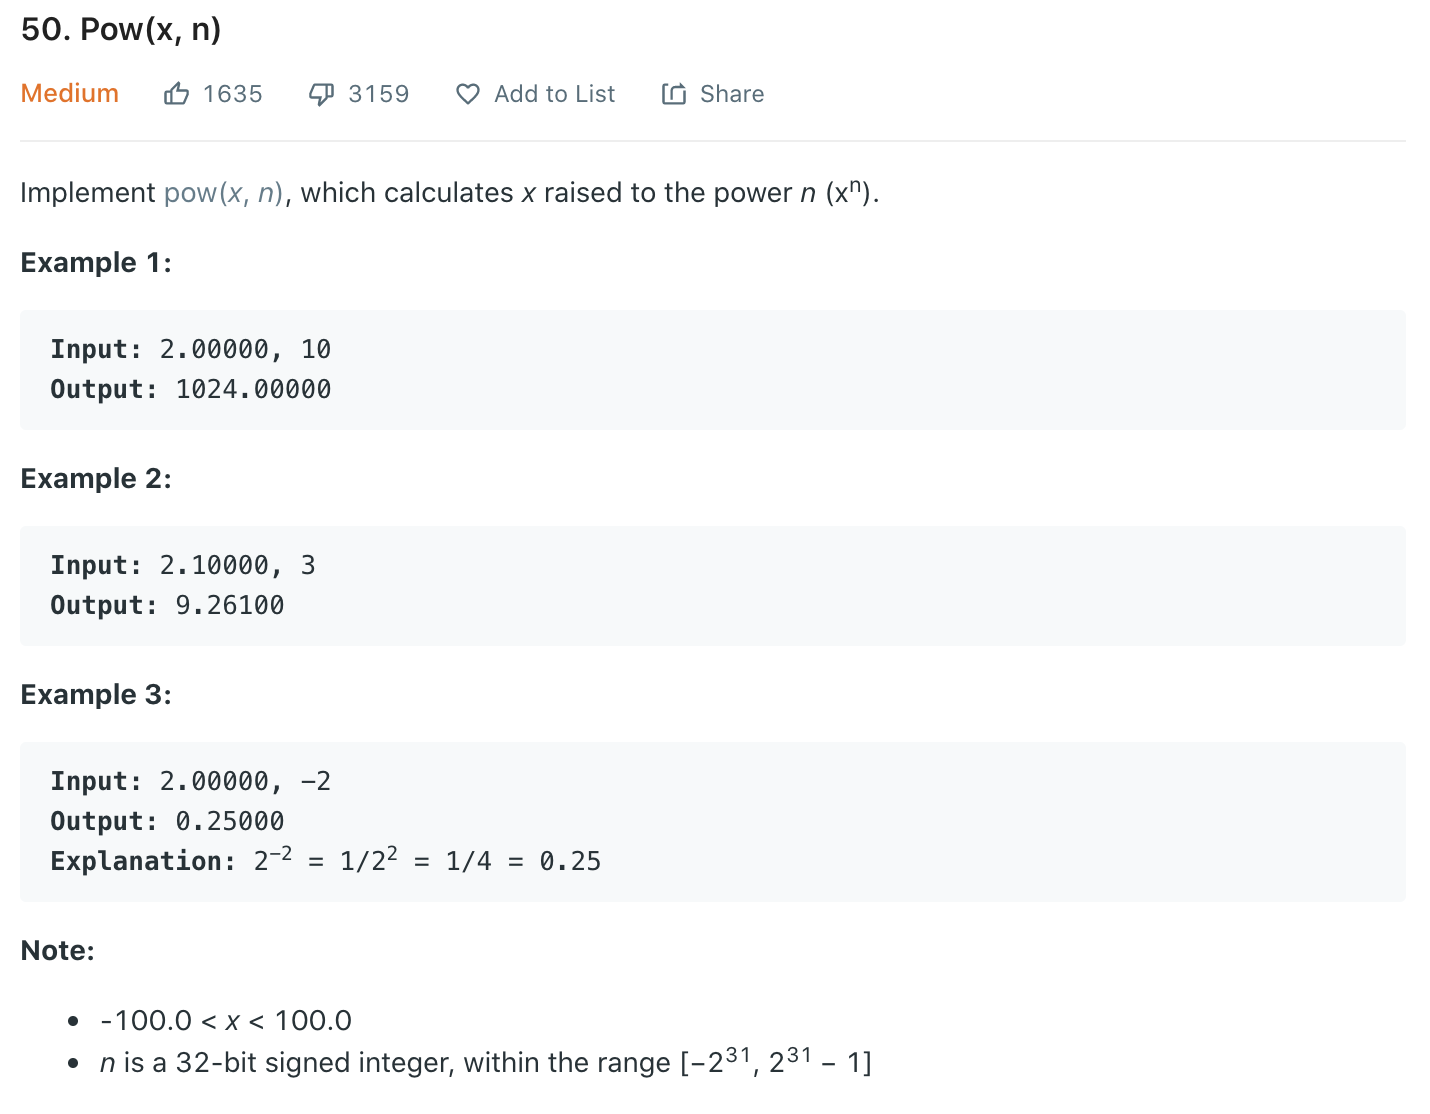

In [1]:
from IPython.display import Image, Video
Image("power_1.png",width=700,height=500)

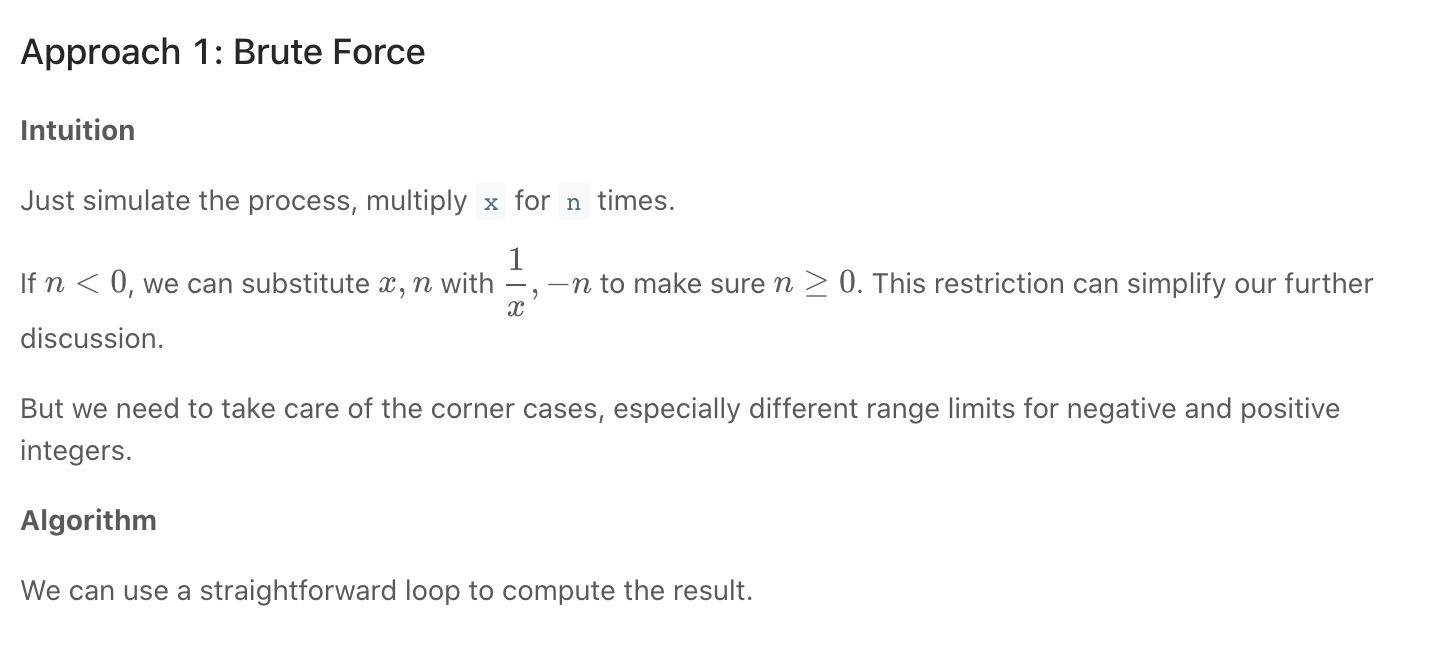

In [2]:
Image("power_2.png",width=700,height=500)

In [3]:
class Solution(object):
    def myPow(self, x, n):
        """
        :type x: float
        :type n: int
        :rtype: float
        """
        N = n
        if N < 0:
            x = 1/x
            N = -N
            
        ans = 1
        for _ in range(N):
            ans = ans * x
            
        return ans

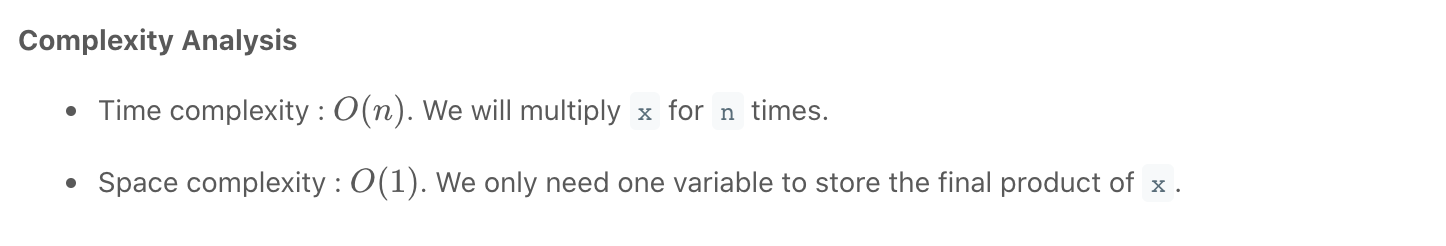

In [4]:
Image("power_3.png",width=700,height=500)

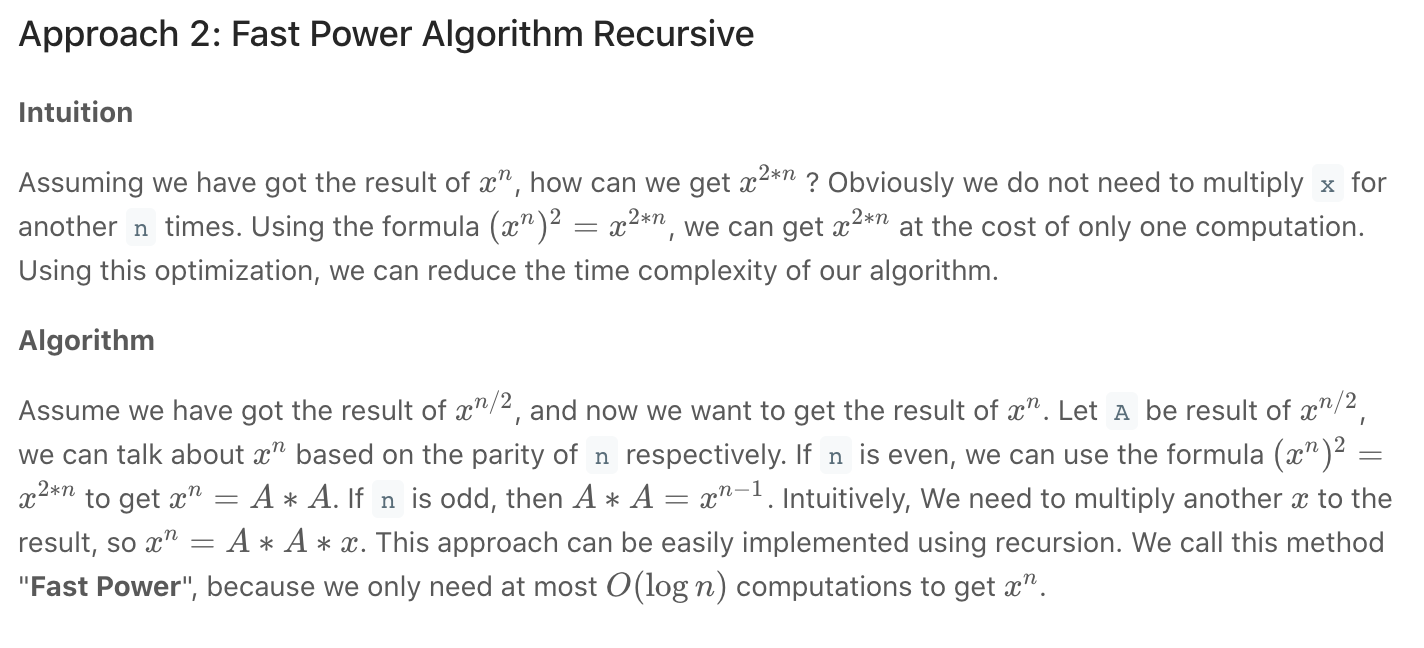

In [5]:
Image("power_4.png",width=700,height=500)

### C++

In [ ]:
class Solution {
public:
    double fastPow(double x, long long n) {
        if (n == 0) {
            return 1.0;
        }
        double half = fastPow(x, n / 2);
        if (n % 2 == 0) {
            return half * half;
        } else {
            return half * half * x;
        }
    }
    double myPow(double x, int n) {
        long long N = n;
        if (N < 0) {
            x = 1 / x;
            N = -N;
        }
        return fastPow(x, N);
    }
};

In [ ]:
class Solution {
public:
    double fastPow(double x, long long n) {
        if (n == 0) {
            return 1.0;
        }
        if (n % 2 == 0) {
            return fastPow(x*x, n / 2);
        } else {
            return x * fastPow(x*x, (n - 1) / 2);
        }
    }
    double myPow(double x, int n) {
        long long N = n;
        if (N < 0) {
            x = 1 / x;
            N = -N;
        }
        return fastPow(x, N);
    }
};

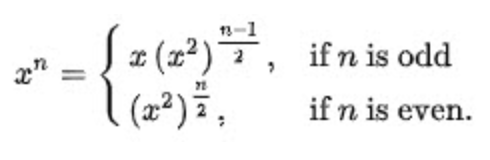

In [11]:
Image("power_8.png",width=200,height=200)

### Python

In [1]:
class Solution(object):
    def myPow(self, x, n):
        """
        :type x: float
        :type n: int
        :rtype: float
        """
        if n < 0:
            x = 1/x
            n = -n
            
        return self.fastPow(x, n)
    
    def fastPow(self, x, n):
        if n == 0:
            return 1
        
        half = self.fastPow(x, n//2)
        if n % 2 == 0:
            return half * half
        else:
            return half * half * x

In [12]:
class Solution:
    def myPow(self, x: float, n: int) -> float:

        def function(base = x, exponent = abs(n)):
            if exponent == 0:
                return 1
            elif exponent % 2 == 0:
                return function(base * base, exponent // 2)
            else:
                return base * function(base * base, (exponent - 1) // 2)

        f = function()
        
        return float(f) if n >= 0 else 1/f

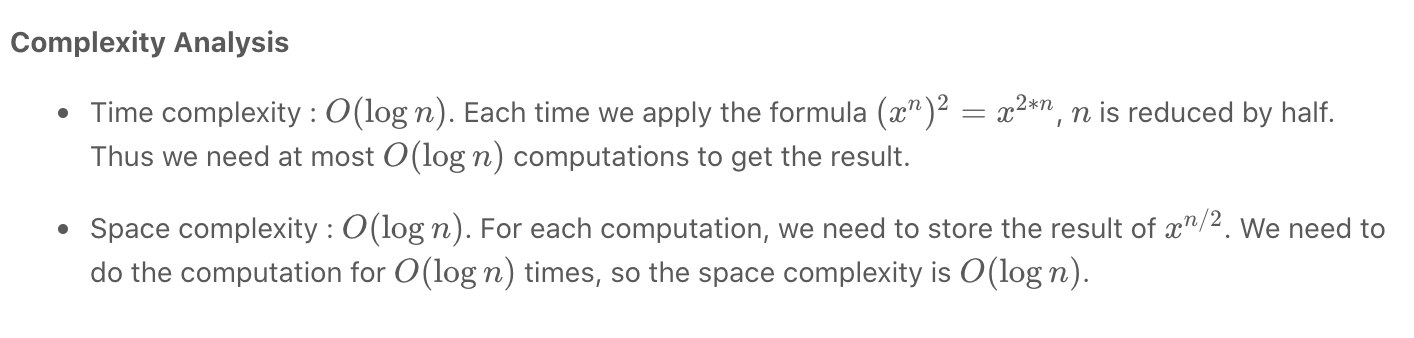

In [13]:
Image("power_5.png",width=700,height=500)

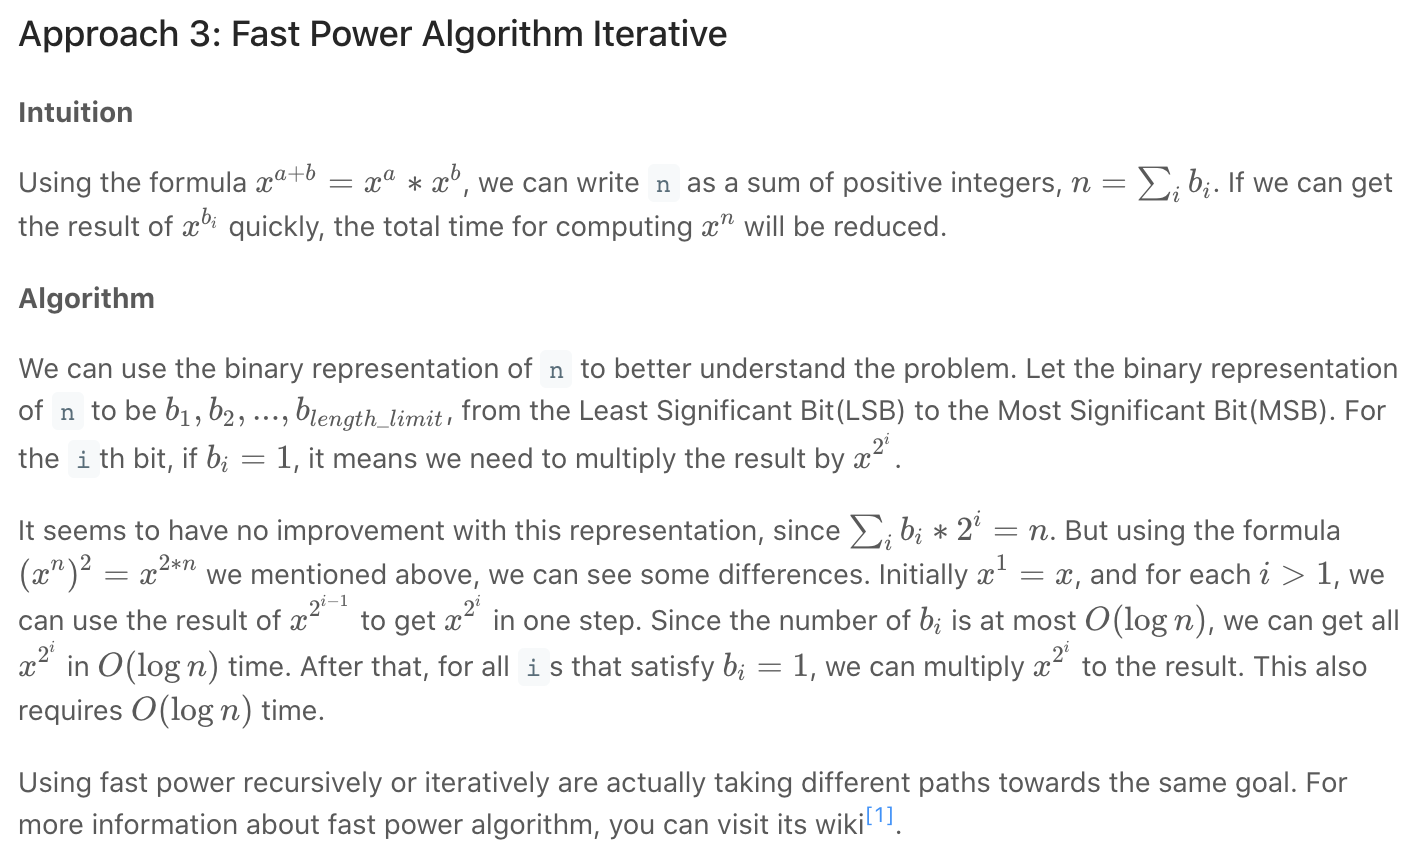

In [14]:
Image("power_6.png",width=700,height=500)

### C++

In [ ]:
class Solution {
public:
    double myPow(double x, int n) {
        long long N = n;
        if (N < 0) {
            x = 1 / x;
            N = -N;
        }
        double ans = 1;
        double current_product = x;
        for (long long i = N; i ; i /= 2) {
            if ((i % 2) == 1) {
                ans = ans * current_product;
            }
            current_product = current_product * current_product;
        }
        return ans;
    }
};

### Python

Adding range generator for for-loop:
https://stackoverflow.com/questions/56444418/is-there-any-method-like-divide-by-or-multiply-by-in-python-range

In [ ]:
class Solution(object):
    
    def range_flexible(self, start, end, action):
        value = start
        while value > end:
            yield value
            value = action(value)
        
    def myPow(self, x, n):
        """
        :type x: float
        :type n: int
        :rtype: float
        """
        if n < 0:
            x = 1/x
            n = -n
            
        ans = 1
        current_product = x
        for i in self.range_flexible(n, 0, lambda x: x//2):
            if (i % 2) == 1:
                ans = ans * current_product
            current_product = current_product * current_product
            
        return ans

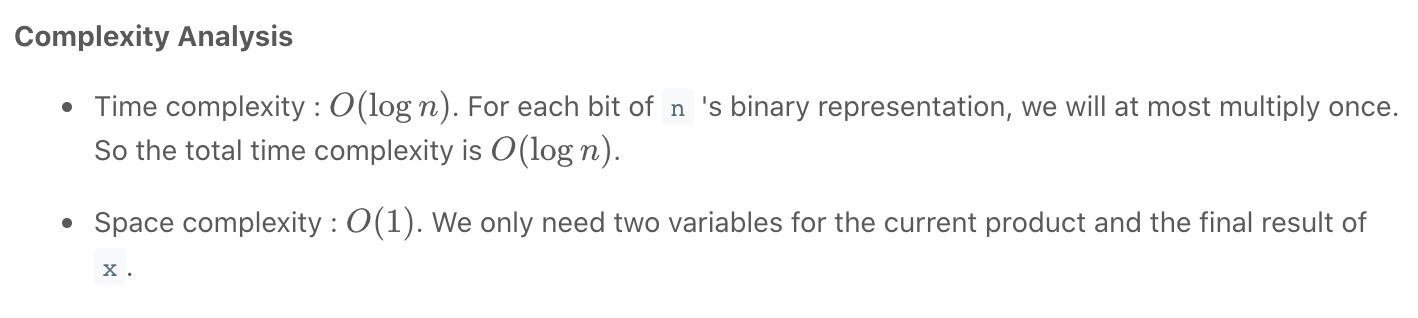

In [15]:
Image("power_7.png",width=700,height=500)

### Dynamic Programming

[Just for fun] besides the approaches above, u can also do it with a dynamic programming approach

by splitting the n, we can get into subproblems.
cache to avoid redundant calculation

In [17]:
"""
             2^10
          2^5 * 2^5
    2^2 * 2^3 * 2^2 * 2^3
2^2 * 2^2 * 2 * 2^2 * 2^2 * 2
"""
class Solution(object):
    def __init__(self):
        self.cache = {}

    def myPow(self, x, n):
        if n == 0:
            return 1
        if n < 0:
            return 1.0/self.helper(x, -n)
        return self.helper(x, n)

    def helper(self, x, n):
        if n in self.cache:
            return self.cache[n]
        if n == 1:
            return x
        left = n/2
        right = n-left
        temp = self.helper(x, left) * self.helper(x, right)
        self.cache[n] = temp
        return temp